# House Price Prediction

## 1. Project Overview

## 2. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Loading

In [3]:
house = pd.read_csv('./datasets/housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 4. Data Cleaning

### Inspection

In [8]:
# Shape of the dataset
print('Shape:')
print(house.shape)

Shape:
(20640, 10)


In [5]:
# Information of the dataset
print('Info:')
print(house.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [6]:
# Description of the dataset
print('Description:')
print(house.describe())

Description:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%    

### Handling Missing Values

In [13]:
# CHeck for missing values represented as percentages
round(((house.isna().sum()/house.shape[0])*100), 2)

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        1.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [14]:
# Check how the rows with missing total_bedrooms are distributed
house[house['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


The missing values are random. We will drop the rows

In [16]:
house = house.dropna(subset='total_bedrooms')
house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 5. Exploratory Data Analysis

### Univariate Analysis

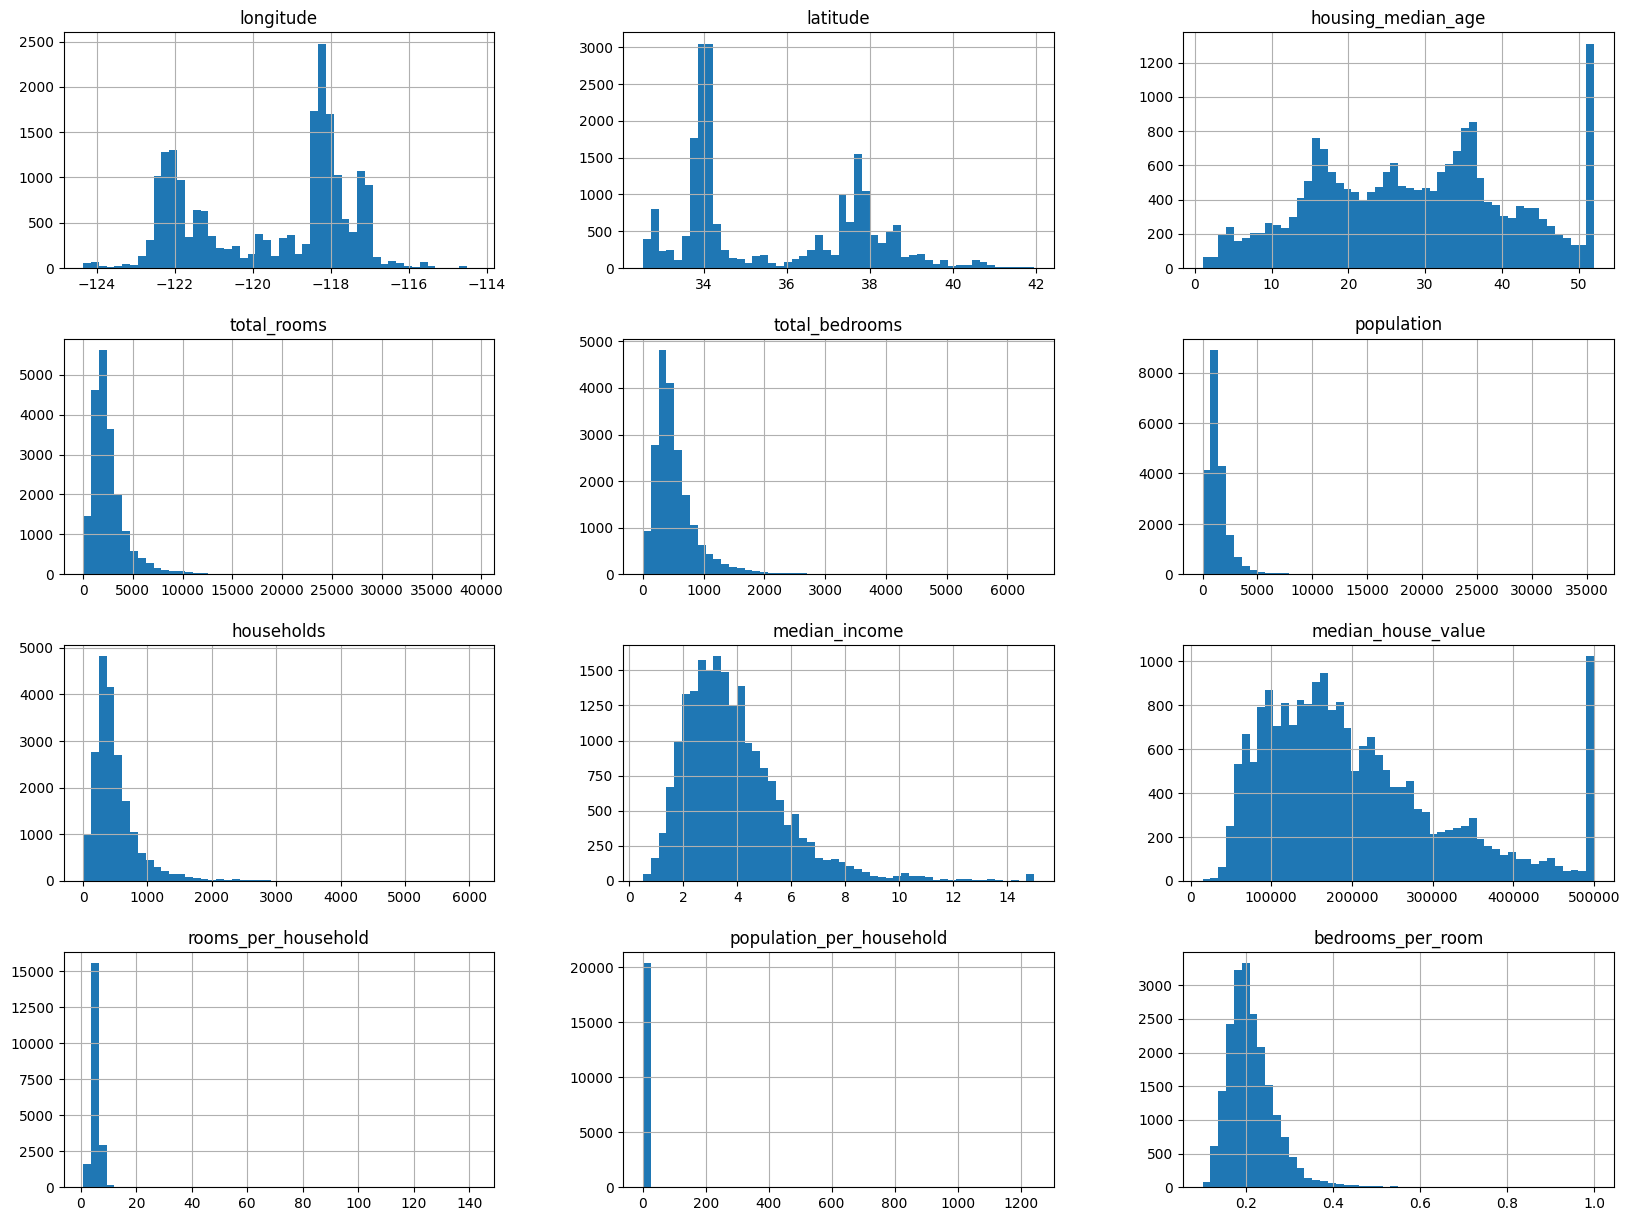

In [21]:
# Plot histograms for numerical features
house.hist(bins=50, figsize=(20,15))
plt.show()

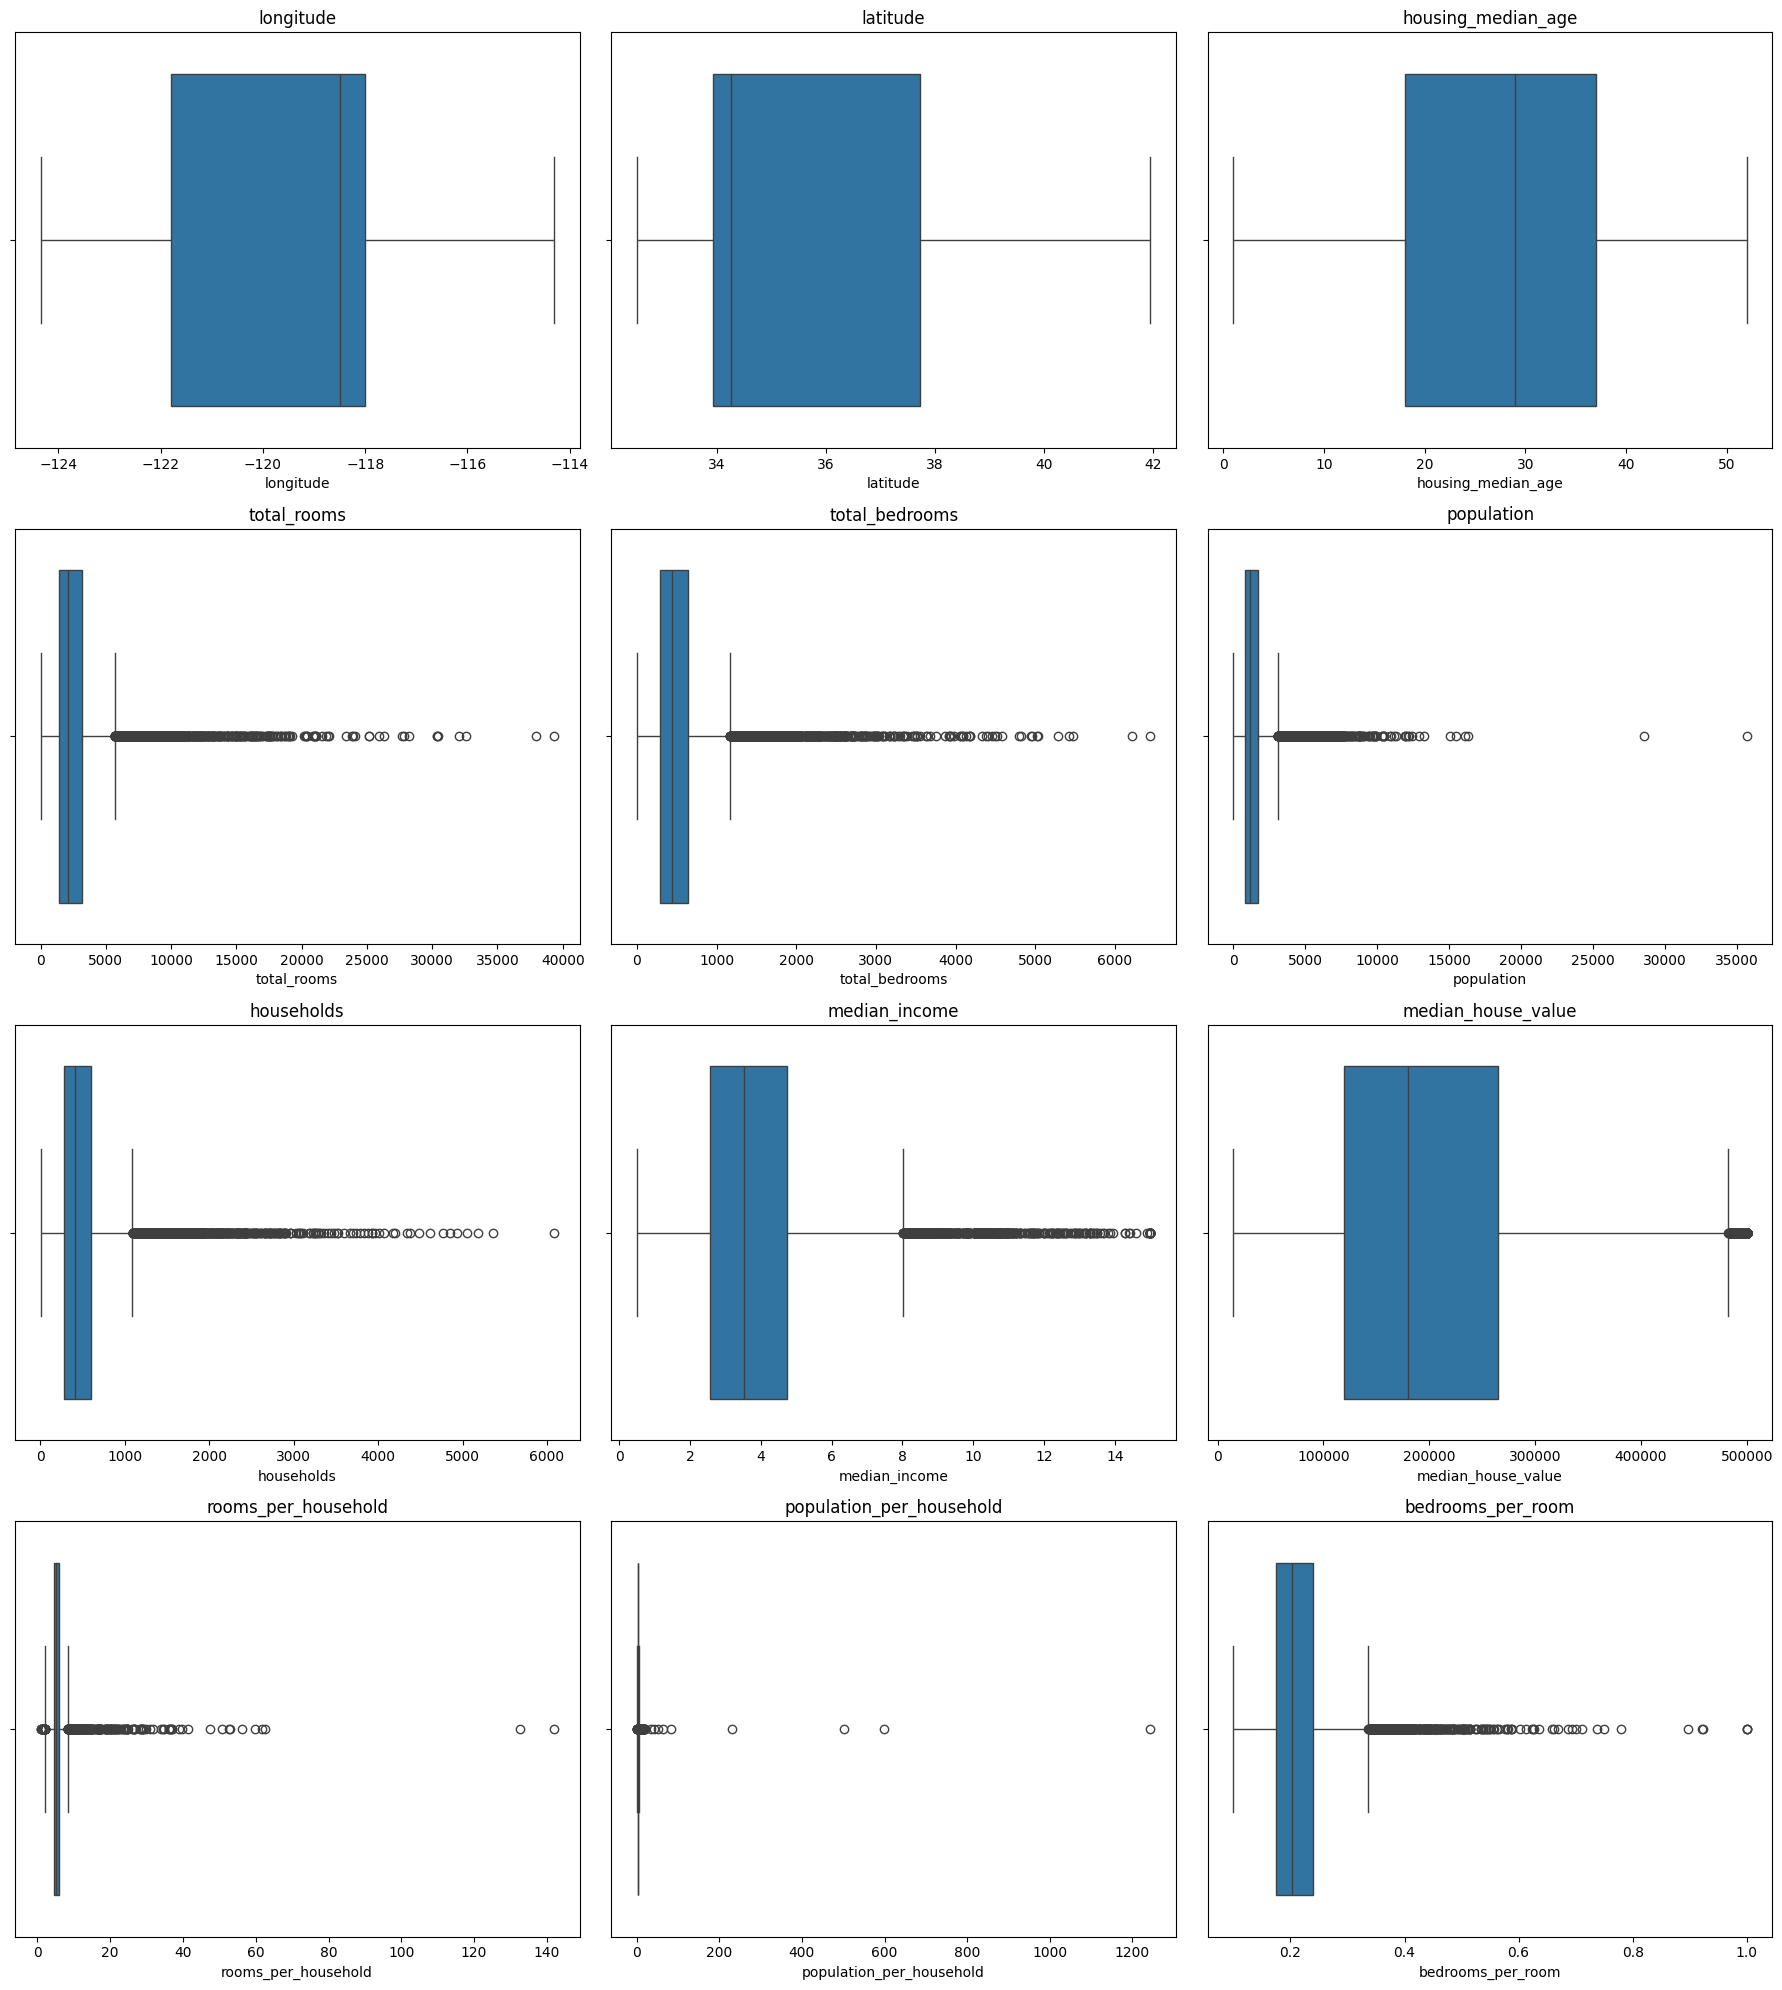

In [23]:
# Drop the categorical column
numeric_columns = house.drop(columns='ocean_proximity').columns

# Set up the grid size
num_plots = len(numeric_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

# Create the subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate the boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=house[column], ax=axes[i])
    axes[i].set_title(column)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


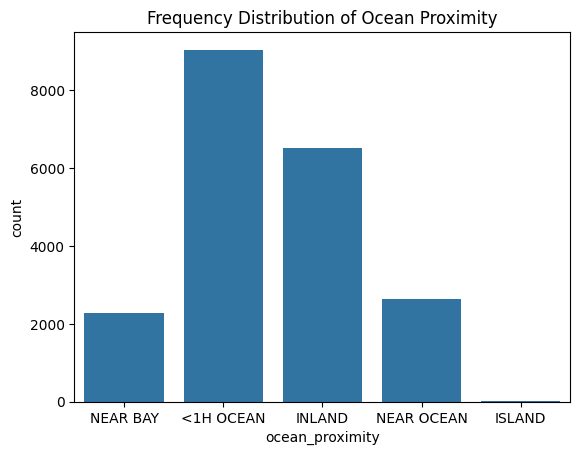

In [24]:
# Explore the categorical variable 'ocean_proximity'
sns.countplot(x='ocean_proximity', data=house)
plt.title('Frequency Distribution of Ocean Proximity')
plt.show()

### Multivariate Analysis

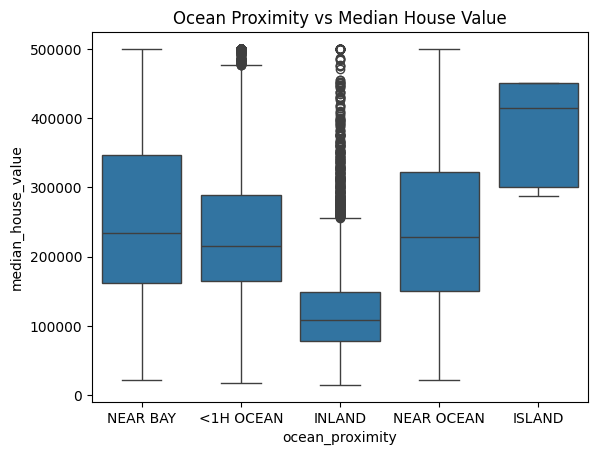

In [30]:
# Boxplot of categorical feature against the target
sns.boxplot(x='ocean_proximity', y='median_house_value', data=house)
plt.title('Ocean Proximity vs Median House Value')
plt.show()

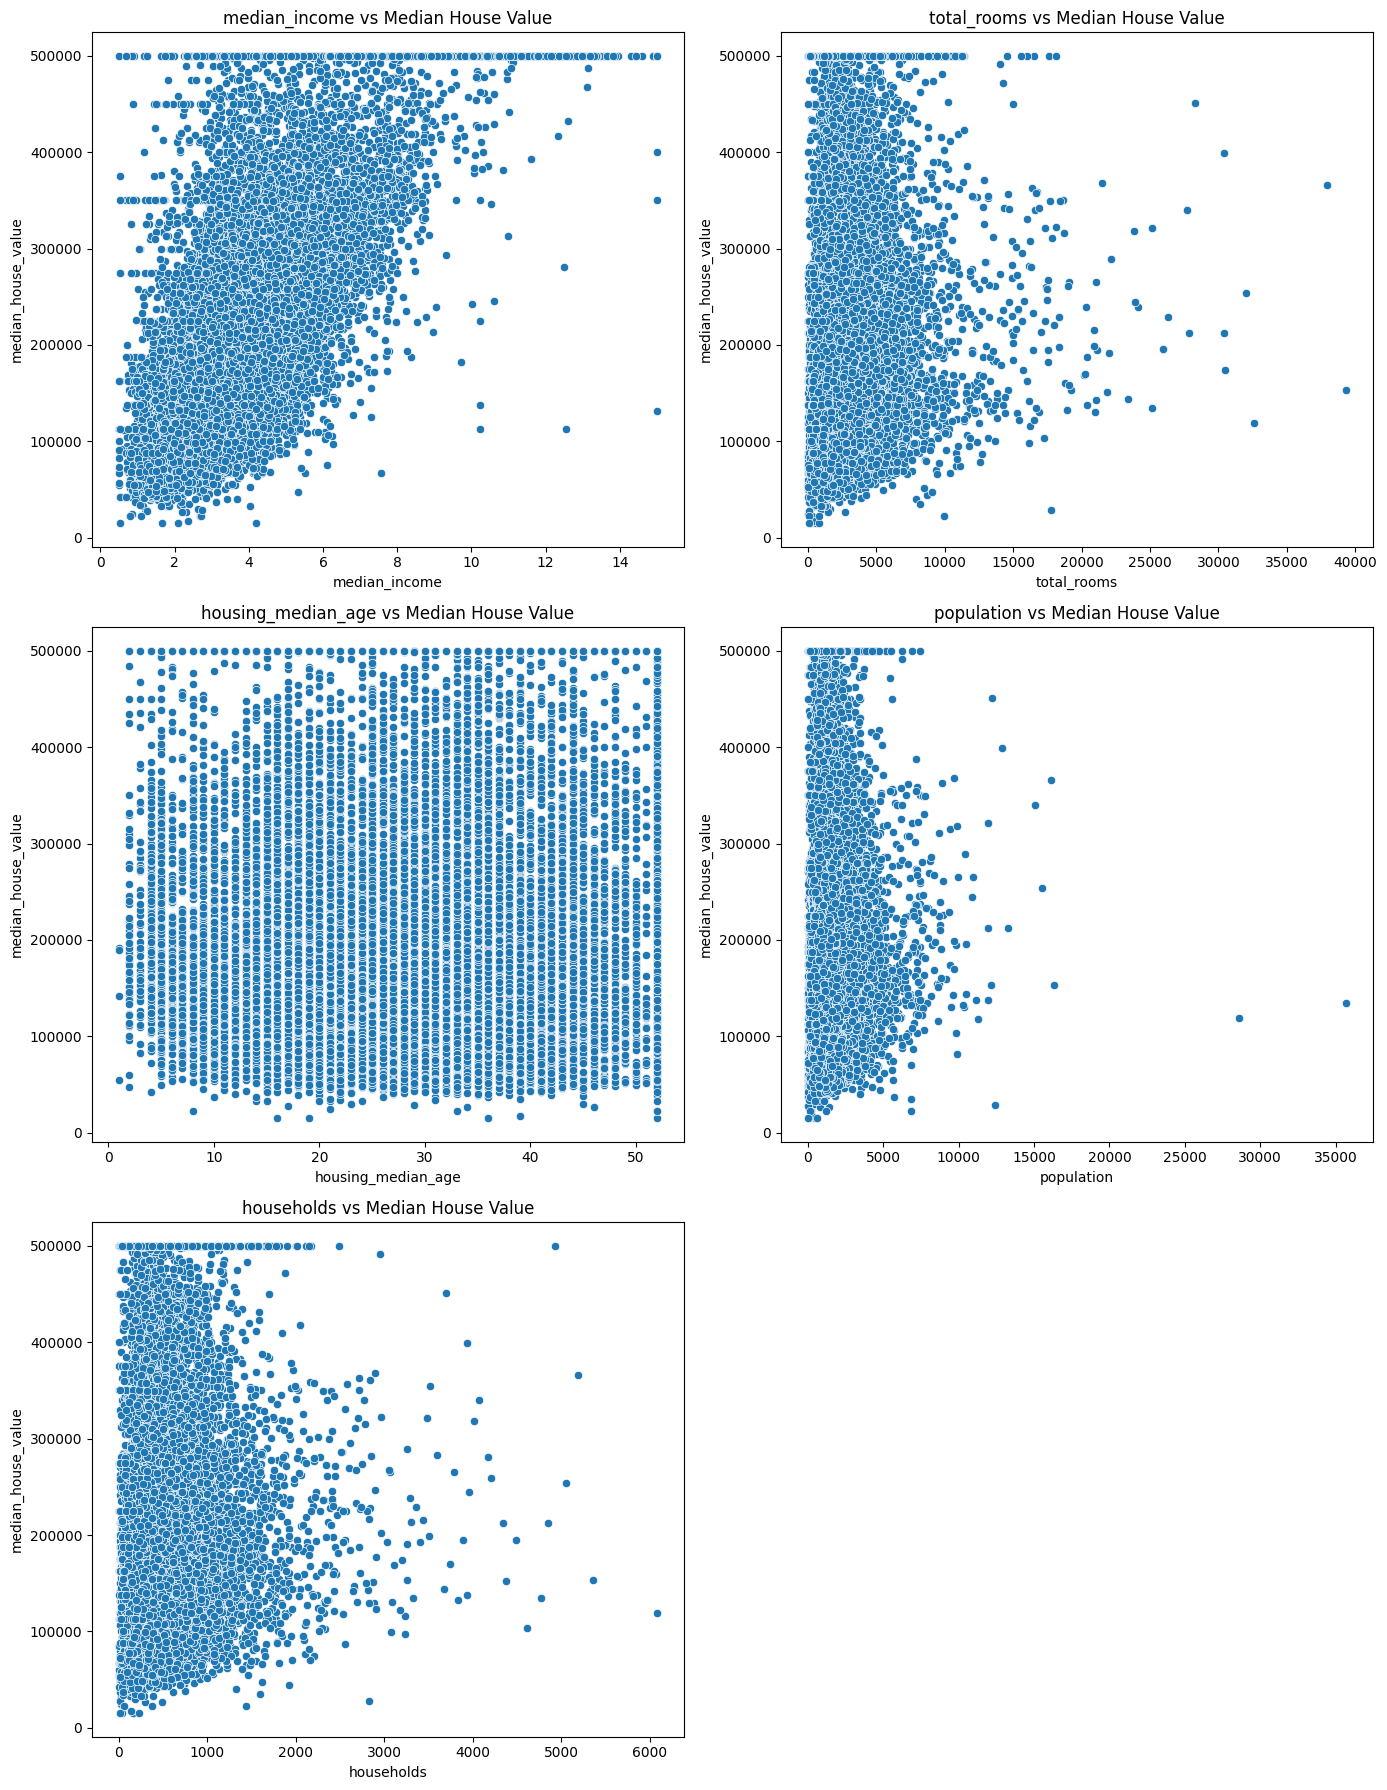

In [32]:
# Scatter plots of numerical features against the target variable in a grid of 2 columns
features = ['median_income', 'total_rooms', 'housing_median_age', 'population', 'households']

# Set up a grid of 3 rows and 2 columns (3x2 grid)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(x=house[feature], y=house['median_house_value'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Median House Value')

# Hide the empty subplot if the number of plots is odd
if len(features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Correlation Analysis

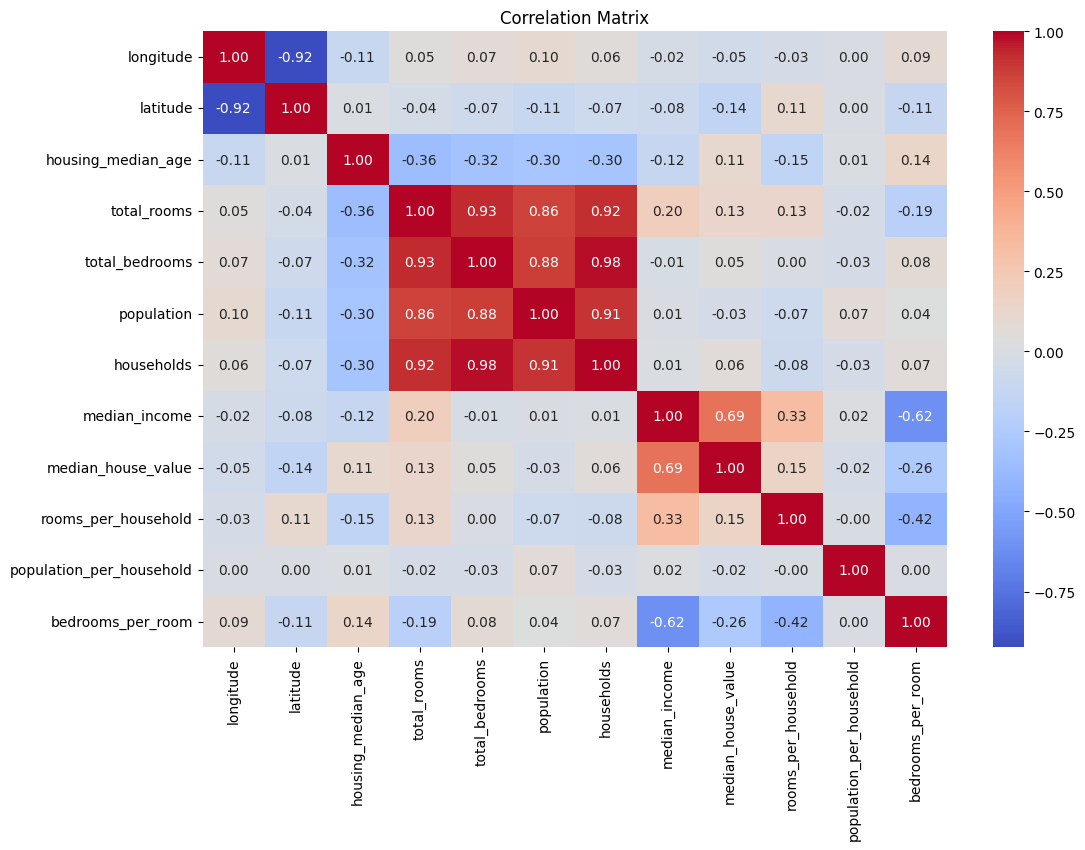

In [29]:
# Compute the correlation matrix
correlation_matrix = house.drop(columns = 'ocean_proximity').corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Look for highly correlated features
high_corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
print(high_corr)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


## 6. Data Preprocessing

### Additional Features

In [ ]:
# To get a closer look at the data
house['rooms_per_household'] = house['total_rooms'] / house['households']
house['population_per_household'] = house['population'] / house['households']
house['bedrooms_per_room'] = house['total_bedrooms'] / house['total_rooms']

### Categorical Variable Sorting

In [ ]:
# Check unique values in the categorical column
house['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# One-hot encoding on the data for the categorical variable
house_df = pd.get_dummies(house, columns=['ocean_proximity'], drop_first=True)

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
house_df_scaled = scaler.fit_transform(house_df)

# Convert back to DataFrame
house_df_scaled = pd.DataFrame(house_df_scaled, columns=house_df.columns)

## 7. Modelling

## 8. Evaluation

## 9. Conclusion